In [507]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [508]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [509]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect,func

In [510]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [511]:
Base = automap_base()

In [512]:
# reflect an existing database into a new model
# reflect the tables
Base.prepare(autoload_with=engine)

In [513]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [514]:
# Save references to each table
Measurement = Base.classes.measurement

In [515]:
# Save references to each table
Station = Base.classes.station

In [516]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [517]:
first_row_measurement = session.query(Measurement).first()
first_row_measurement.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fa7c013d250>,
 'prcp': 2.0,
 'id': 0,
 'date': '2010-01-01',
 'tobs': 18.3,
 'station': 'USC00519397'}

In [518]:
first_row_station = session.query(Station).first()
first_row_station.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fa8006a9e90>,
 'id': 0,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'station': 'USC00519397',
 'latitude': 21.2716,
 'elevation': 0.914}

# Exploratory Precipitation Analysis

In [519]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [520]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [521]:
# Total dates
session.query(func.count(Measurement.date)).all()

[(19550,)]

In [522]:
# Find the first date in the data set.
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01',)

In [523]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [524]:
from datetime import datetime, timedelta

In [525]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

# Perform a query to retrieve the data and precipitation scores

query_date = dt.date(2016, 8, 22) 


results = session.query(Measurement.date, 
                        Measurement.prcp).\
                              order_by(Measurement.date.asc()).\
                  filter(func.strftime(Measurement.date) > query_date).all()


# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

prcp_rows_df = pd.DataFrame({"Date": result[0], "Precipitation": result[1]} for result in results)
prcp_rows_df.set_index(["Date"])

,Precipitation
Date,
2016-08-23,0.0
2016-08-23,3.8
2016-08-23,1.3
2016-08-23,NaN
2016-08-23,0.5
...,...
2017-08-22,12.7
2017-08-23,0.0
2017-08-23,0.0


In [526]:
prcp_rows_nonull_df = prcp_rows_df.dropna(how='any')
prcp_rows_nonull_df

,Date,Precipitation
0,2016-08-23,0.0
1,2016-08-23,3.8
2,2016-08-23,1.3
4,2016-08-23,0.5
5,2016-08-23,45.5
...,...,...
2225,2017-08-22,12.7
2226,2017-08-23,0.0
2227,2017-08-23,0.0
2228,2017-08-23,2.0


In [527]:
prcp_one_date_df = prcp_rows_nonull_df.loc[prcp_rows_nonull_df["Date"] == "2016-08-23", :]
prcp_one_date_df


,Date,Precipitation
0,2016-08-23,0.0
1,2016-08-23,3.8
2,2016-08-23,1.3
4,2016-08-23,0.5
5,2016-08-23,45.5
6,2016-08-23,17.8


In [528]:
prcp_rows_nonull_dategroup_df = prcp_rows_nonull_df.groupby(["Date"])
prcp_rows_nonull_dategroup_df

In [529]:
group = prcp_rows_nonull_dategroup_df["Precipitation"].sum()
group

Date
2016-08-23     68.9
2016-08-24    236.9
2016-08-25     13.6
2016-08-26      2.6
2016-08-27      8.1
              ...  
2017-08-19      2.3
2017-08-20      0.3
2017-08-21     14.7
2017-08-22     12.7
2017-08-23     13.4
Name: Precipitation, Length: 366, dtype: float64

In [530]:
group_df = pd.DataFrame(group)
group_df

,Precipitation
Date,
2016-08-23,68.9
2016-08-24,236.9
2016-08-25,13.6
2016-08-26,2.6
2016-08-27,8.1
...,...
2017-08-19,2.3
2017-08-20,0.3
2017-08-21,14.7


In [531]:
x_axis = list(group_df.index.values)

In [532]:
y_axis = group_df["Precipitation"]

In [533]:
import datetime 

TypeError: 'Query' object is not callable

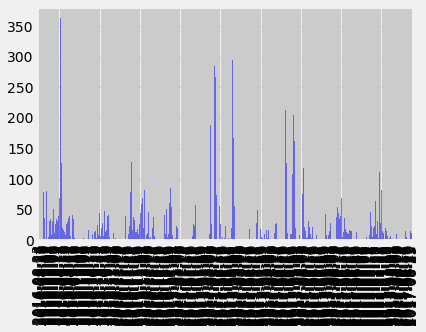

In [538]:
# Use Pandas Plotting with Matplotlib to plot the data
# labels=["2016_08_23","2016_11_09","2017_01_28","2017_04_18","2017_07_10"]
# x_axis = np.arange(y_axis)
plt.bar(x_axis, y_axis, color="b", alpha=0.5, align="center")
# plt.setp(labels, rotation=90, fontsize=9)
# plt.xticks(rotation='vertical')
# tick_locations = [value for value in xticks]
# plt.xticks(xticks, rotation='vertical')
# plt.xticks(tick_locations, x_axis)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(y_axis)+10)
plt.title("Precipitation by Date")
plt.xlabel("Date")
plt.ylabel("Precipitation in mm")
plt.gcf
# plt.savefig("../Images/Precipitation.png")
plt.show()

In [539]:
# Use Pandas to calcualte the summary statistics for the precipitation data
group_df.describe()

,Precipitation
count,366.000000
mean,24.880874
std,45.110917
min,0.000000
25%,1.425000
50%,10.250000
75%,27.650000
max,362.700000


In [540]:
import scipy.stats as st

In [541]:
# Demonstrate calculating measures of central tendency
mean_numpy = np.mean(group_df["Precipitation"])
print(f"The mean precipitation 12 months back from 2017-08-23 is {mean_numpy}")

median_numpy = np.median(group_df["Precipitation"])
print(f"The median precipitation 12 months back from 2017-08-23 is {median_numpy}")

mode_scipy = st.mode(group_df["Precipitation"])
print(f"The mode precipitation 12 months back from 2017-08-23 is {mode_scipy}")


The mean precipitation 12 months back from 2017-08-23 is 24.880874316939888
The median precipitation 12 months back from 2017-08-23 is 10.25
The mode precipitation 12 months back from 2017-08-23 is ModeResult(mode=array([0.]), count=array([48]))


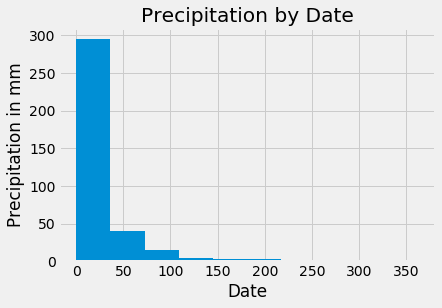

NormaltestResult(statistic=331.0090775314818, pvalue=1.3252325186691376e-72)


In [542]:
# Characterize the data set using matplotlib and stats.normaltest
plt.hist(group_df["Precipitation"])
plt.title("Precipitation by Date")
plt.xlabel("Date")
plt.ylabel("Precipitation in mm")
plt.show()
print(st.normaltest(group_df["Precipitation"].sample(366)))

In [543]:
# on full sample requires removing nulls, group by, order by etc
# print(st.normaltest(_df["Precipitation"].sample(19551)))

In [544]:
# Demonstrate calculating the variance and standard deviation using the different modules
var_numpy = np.var(group_df["Precipitation"],ddof = 0)
print(f"The population variance using the NumPy module is {var_numpy}")

sd_numpy = np.std(group_df["Precipitation"],ddof = 0)
print(f"The population standard deviation using the NumPy module is {sd_numpy}")

The population variance using the NumPy module is 2029.4347708202695
The population standard deviation using the NumPy module is 45.04924828252153


In [545]:
# Calculate the 68-95-99.7 rule using the standard deviation
print(f"Roughly 68% of the data is between {round(mean_numpy-sd_numpy,3)} and {round(mean_numpy+sd_numpy,3)}")
print(f"Roughly 95% of the data is between {round(mean_numpy-2*sd_numpy,3)} and {round(mean_numpy+2*sd_numpy,3)}")
print(f"Roughly 99.7% of the data is between {round(mean_numpy-3*sd_numpy,3)} and {round(mean_numpy+3*sd_numpy,3)}")

Roughly 68% of the data is between -20.168 and 69.93
Roughly 95% of the data is between -65.218 and 114.979
Roughly 99.7% of the data is between -110.267 and 160.029


In [546]:
# Demonstrate calculating the z-scores using SciPy
z_scipy = st.zscore(group_df["Precipitation"])
print(f"The z-scores using the SciPy module are {z_scipy}")

The z-scores using the SciPy module are [ 9.77133412e-01  4.70638543e+00 -2.50412043e-01 -4.94589259e-01
 -3.72500651e-01  1.19911270e+00  2.71239280e-01 -5.12347602e-01
  1.24128876e+00 -5.34545530e-01 -4.10237130e-01  1.62469430e-01
  2.29063216e-01 -3.59181894e-01  1.42491294e-01  5.75350903e-01
 -2.90368315e-01  5.36995794e-02  2.40162180e-01  1.51370466e-01
  3.15635138e-01  9.74913619e-01  7.49888486e+00  2.24463514e+00
 -8.83671641e-02 -1.70499500e-01 -2.52631836e-01 -3.68061065e-01
  2.92818578e-02  1.06974608e-01  2.57920523e-01  3.33393481e-01
 -3.92478787e-01 -5.01248637e-01  3.86668509e-01  2.13524666e-01
 -4.79050709e-01  1.13251891e+00  9.80954367e-02  2.66799695e-01
 -1.46081779e-01 -1.61620329e-01  1.41665240e+00 -8.83671641e-02
 -4.61292366e-01 -5.45644495e-01 -5.30105945e-01 -5.52303873e-01
 -5.52303873e-01 -1.63840122e-01 -5.05688223e-01 -5.07908016e-01
 -5.52303873e-01 -3.32544379e-01 -5.52303873e-01 -2.39313079e-01
 -2.12675565e-01 -4.56852780e-01  1.81828935e-02 -

In [555]:
# Close the session
session.close()

# Exploratory Station Analysis

In [556]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [557]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(Station.station)).all()


[(9,)]

In [558]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query = sqlalchemy.select([Measurement.station,
                                   sqlalchemy.func.count(Measurement.station)]).order_by(sqlalchemy.func.count(Measurement.station).desc()).group_by(Measurement.station)
  
result = engine.execute(session.query).fetchall()
  
for record in result:
    print("\n", record)


 ('USC00519281', 2772)

 ('USC00519397', 2724)

 ('USC00513117', 2709)

 ('USC00519523', 2669)

 ('USC00516128', 2612)

 ('USC00514830', 2202)

 ('USC00511918', 1979)

 ('USC00517948', 1372)

 ('USC00518838', 511)


In [559]:
from sqlalchemy.orm import sessionmaker

In [560]:
Session = sessionmaker(bind=engine)
session = Session()

In [576]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

result = session.query(Measurement) \
    .with_entities(Measurement.station,Measurement.tobs) \
        .filter(Measurement.station == 'USC00519281').all()

# station_df = pd.DataFrame({"Station": result[0],"Temperature": result[1]} for r in result)
# station_df.head(20)

for r in result:
    print(r.tobs)

# print(station_temp)

21.1
16.7
23.3
23.9
23.3
24.4
20.6
18.9
21.1
23.9
17.8
15.6
16.1
20.0
17.8
18.9
19.4
21.1
19.4
19.4
20.6
15.6
23.9
23.9
18.3
23.9
20.6
19.4
18.9
20.6
22.2
19.4
18.3
17.8
19.4
19.4
20.0
20.6
18.9
20.6
16.1
21.7
21.1
21.1
18.9
21.7
16.1
20.0
19.4
16.7
18.3
20.6
17.2
16.7
16.1
17.8
22.2
20.0
20.0
20.0
21.7
20.6
18.3
19.4
21.7
21.1
20.6
20.6
21.1
20.6
21.1
22.8
23.3
19.4
20.0
17.8
18.3
20.0
20.0
22.2
19.4
17.8
21.7
21.1
22.2
22.8
23.3
20.6
21.7
22.2
21.7
23.3
22.8
21.7
21.7
20.6
20.6
22.2
20.0
23.9
20.6
18.3
20.0
18.3
18.9
17.8
20.6
20.6
21.1
20.6
20.6
20.6
21.1
25.0
25.0
21.7
21.7
21.1
21.1
22.2
22.8
21.7
21.1
22.2
22.8
22.2
20.0
24.4
25.0
22.8
20.6
21.7
22.8
22.8
25.0
22.8
22.8
22.2
22.2
21.7
22.8
22.2
22.2
22.2
22.2
22.8
20.6
20.6
23.9
23.3
23.9
21.7
21.7
22.2
22.2
24.4
25.0
21.7
22.8
22.8
23.9
27.2
23.3
25.0
21.1
20.6
21.1
22.2
21.7
25.0
24.4
23.3
23.3
23.3
23.3
21.7
26.7
25.0
22.2
22.2
22.8
22.8
21.7
22.2
22.8
23.3
21.1
21.1
22.8
23.3
23.3
25.0
21.1
20.6
21.1
21.1
24.4
22.2
23.3
22.8


In [574]:
for r in result:
    print(r.tobs).max()

21.1


AttributeError: 'NoneType' object has no attribute 'max'

In [570]:
(r.tobs).max()

AttributeError: 'float' object has no attribute 'max'

In [566]:
station_df.Temperature.min()

(21.1,)

In [ ]:
station_df.Temperature.mean()

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()